In [1]:
import pandas as pd

# Load CSV from path
df = pd.read_csv('/content/breast-cancer.csv')

# Preview dataset
print("Dataset Shape:", df.shape)
print(df.head())



Dataset Shape: (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  

In [2]:
df = pd.read_csv('/content/breast-cancer.csv')
df.drop('id', axis=1, inplace=True)

# Convert 'diagnosis' to binary: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("Updated dataset shape:", df.shape)
print(df['diagnosis'].value_counts())  # Check class distribution

Updated dataset shape: (569, 31)
diagnosis
0    357
1    212
Name: count, dtype: int64


In [3]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
print("Linear SVM Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))

# RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
print("RBF SVM Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))

# Classification report
print("Classification Report (RBF):\n", classification_report(y_test, svm_rbf.predict(X_test)))


Linear SVM Accuracy: 0.956140350877193
RBF SVM Accuracy: 0.9736842105263158
Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



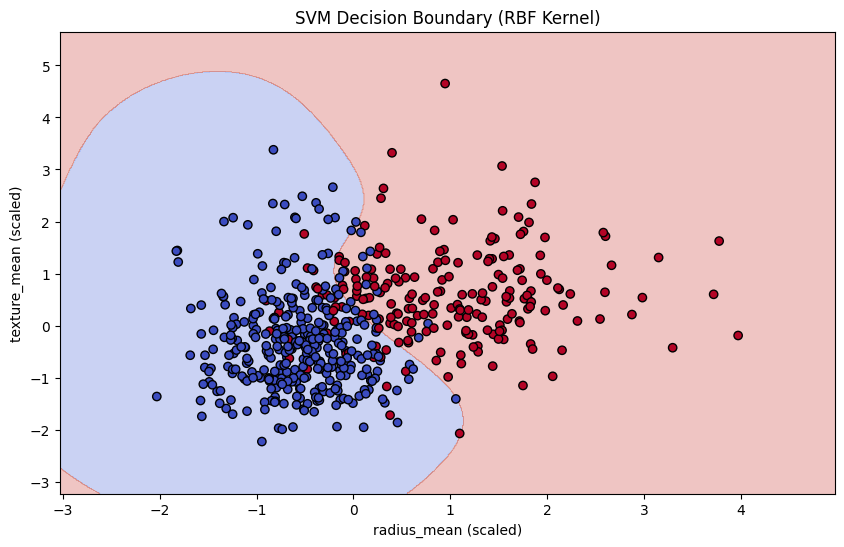

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Use 2 features
features_2d = ['radius_mean', 'texture_mean']
X_2D = df[features_2d]
y_2D = df['diagnosis']

# Normalize
X_2D_scaled = StandardScaler().fit_transform(X_2D)

# Train-test split
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D_scaled, y_2D, test_size=0.2, random_state=42)

# Train SVM with RBF kernel
svm_2d = SVC(kernel='rbf', C=1, gamma='auto')
svm_2d.fit(X_train_2D, y_train_2D)

# Plot decision boundary
x_min, x_max = X_2D_scaled[:, 0].min() - 1, X_2D_scaled[:, 0].max() + 1
y_min, y_max = X_2D_scaled[:, 1].min() - 1, X_2D_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_2D_scaled[:, 0], X_2D_scaled[:, 1], c=y_2D, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("radius_mean (scaled)")
plt.ylabel("texture_mean (scaled)")
plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV

# Grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

# Run Grid Search
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)
print(" Best Cross-Validation Score:", grid.best_score_)

# Test set accuracy with best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(" Accuracy on Test Set:", accuracy_score(y_test, y_pred))


 Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
 Best Cross-Validation Score: 0.9736263736263737
 Accuracy on Test Set: 0.9736842105263158


In [8]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
scores = cross_val_score(best_model, X_scaled, y, cv=5)
print(" Cross-validation scores:", scores)
print(" Mean Accuracy:", scores.mean())


 Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
 Mean Accuracy: 0.9736376339077782
